# Feature importances

### AI Masters, "Машинное обучение 2"

Мы обучили модель, зачем что-то знать о фичах?

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('data/application_train.csv')
data.columns = [f.lower() for f in data.columns]
data

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
cat_columns = []
num_columns = []
info_columns = ['target', 'sk_id_curr']
for f in data.columns:
    if f in info_columns:
        continue
    elif data[f].dtype == 'object':
        cat_columns.append(f)
    else:
        num_columns.append(f)
print(len(cat_columns), len(num_columns))

16 104


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    data[num_columns],
    data.target,
    test_size=0.3
)

In [5]:
x_train.shape, x_test.shape

((215257, 104), (92254, 104))

## lightgbm.plot_importance

In [6]:
import lightgbm as lgb

In [7]:
train_dataset = lgb.Dataset(
    data=x_train,
    label=y_train,
)
test_dataset = lgb.Dataset(
    data=x_test,
    label=y_test,
)

In [8]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "num_leaves": 31,
    "learning_rate": 0.1,
    "verbose": 10,
    "seed": 0
}


In [9]:
lgb_clf = lgb.train(
    params,
    train_set=train_dataset,
    num_boost_round=1000,
    valid_sets=test_dataset,
    callbacks=[lgb.early_stopping(stopping_rounds=50)],
)

[LightGBM] [Info] Number of positive: 17349, number of negative: 197908
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.895532
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.374338
[LightGBM] [Debug] init for col-wise cost 0.014162 seconds, init for row-wise cost 0.072491 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 11131
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080597 -> initscore=-2.434267
[LightGBM] [Info] Start training from score -2.434267
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
Training until validation scores don't improve for 50 rounds
[LightGBM]

[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 13
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] 

смотрим https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.Booster.html#lightgbm.Booster.feature_importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

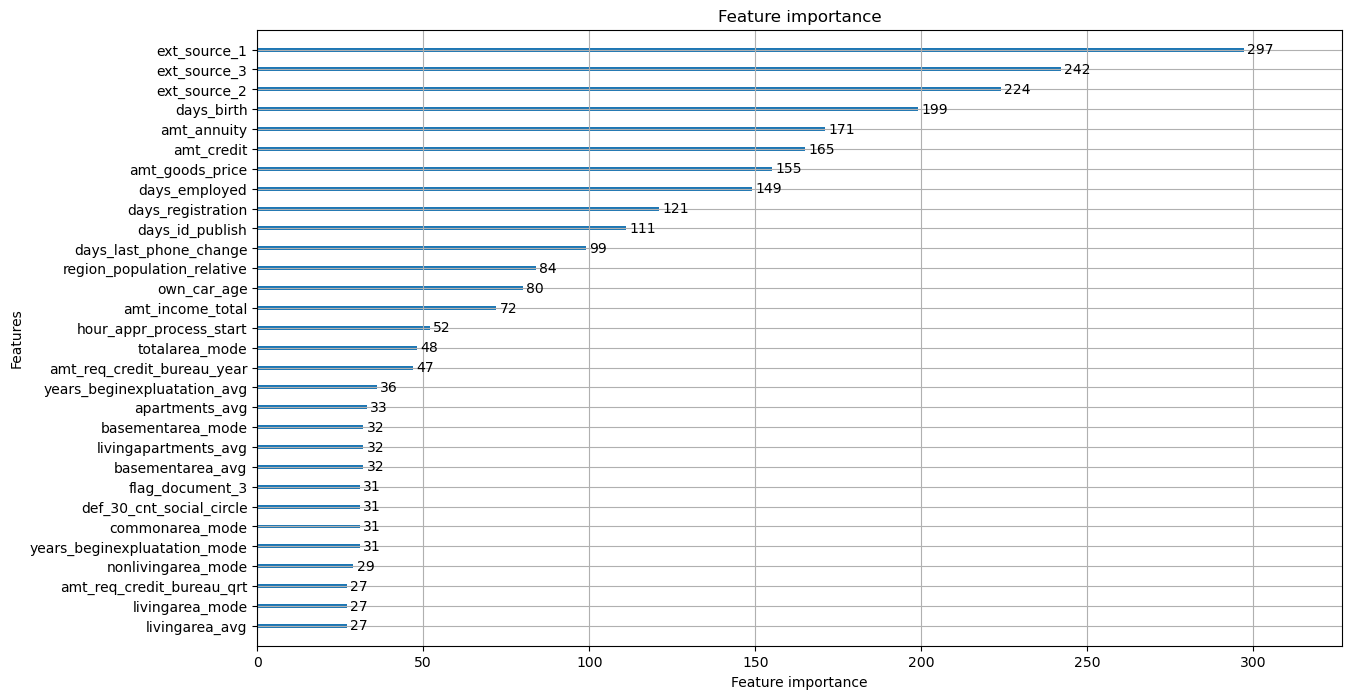

In [10]:
lgb.plot_importance(lgb_clf, importance_type='split', figsize=(14, 8), max_num_features=30)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

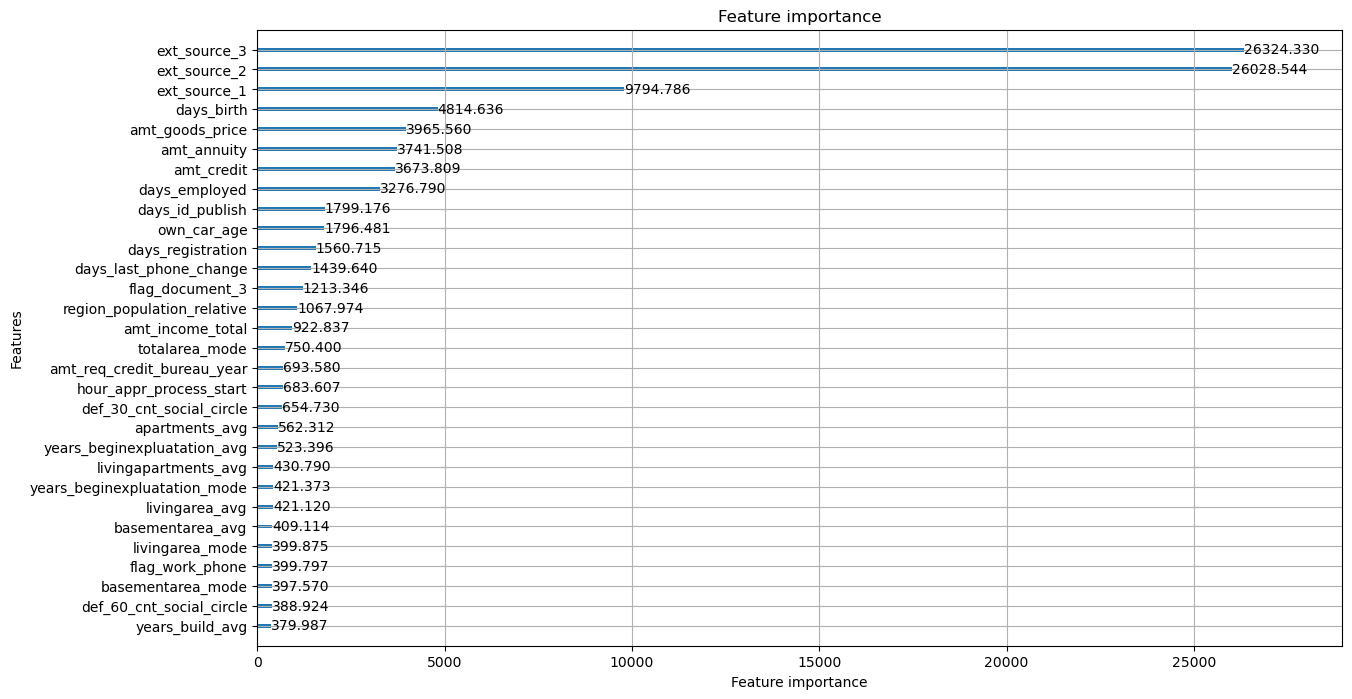

In [11]:
lgb.plot_importance(lgb_clf, importance_type='gain', figsize=(14, 8), max_num_features=30)

## Catboost feature importance

In [12]:
import catboost as cb

In [13]:
train_pool = cb.Pool(
    data=x_train,
    label=y_train,
)
test_pool = cb.Pool(
    data=x_test,
    label=y_test,
)

In [14]:
cb_clf = cb.CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    random_seed=0,
    eval_metric='AUC',
)

In [15]:
cb_clf.fit(
    train_pool,
    eval_set=test_pool,
    use_best_model=True,
    verbose=10,
    early_stopping_rounds=50,
)

0:	test: 0.6345835	best: 0.6345835 (0)	total: 95.7ms	remaining: 1m 35s
10:	test: 0.7178050	best: 0.7178050 (10)	total: 399ms	remaining: 35.8s
20:	test: 0.7356952	best: 0.7356952 (20)	total: 734ms	remaining: 34.2s
30:	test: 0.7445261	best: 0.7445261 (30)	total: 1.06s	remaining: 33.1s
40:	test: 0.7480291	best: 0.7480291 (40)	total: 1.38s	remaining: 32.2s
50:	test: 0.7507089	best: 0.7507089 (50)	total: 1.68s	remaining: 31.3s
60:	test: 0.7524352	best: 0.7524352 (60)	total: 2.04s	remaining: 31.5s
70:	test: 0.7533121	best: 0.7533121 (70)	total: 2.35s	remaining: 30.7s
80:	test: 0.7544807	best: 0.7544873 (78)	total: 2.67s	remaining: 30.2s
90:	test: 0.7552124	best: 0.7552411 (89)	total: 2.98s	remaining: 29.7s
100:	test: 0.7555182	best: 0.7555182 (100)	total: 3.27s	remaining: 29.2s
110:	test: 0.7562096	best: 0.7562096 (110)	total: 3.58s	remaining: 28.7s
120:	test: 0.7562950	best: 0.7562950 (120)	total: 3.92s	remaining: 28.4s
130:	test: 0.7566934	best: 0.7566934 (130)	total: 4.22s	remaining: 28s


смотрим <br>
https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_get_feature_importance <br>
https://catboost.ai/en/docs/concepts/fstr#regular-feature-importance

In [16]:
cb_clf.get_feature_importance(data=test_pool, type='PredictionValuesChange', prettified=True).head(40)

,Feature Id,Importances
0,ext_source_3,15.498553
1,ext_source_2,12.820525
2,ext_source_1,7.799139
3,days_birth,6.561016
4,amt_goods_price,5.315823
5,amt_credit,5.030541
6,amt_annuity,4.101511
7,days_employed,3.704193
8,days_id_publish,2.551481
9,own_car_age,2.040260


In [17]:
cb_clf.get_feature_importance(data=test_pool, type='Interaction', prettified=True).head(40)

,First Feature Index,Second Feature Index,Interaction
0,28,29,1.501802
1,2,4,1.436975
2,6,27,1.292833
3,6,28,1.249464
4,2,3,1.102439
5,3,4,0.971814
6,27,28,0.922208
7,6,29,0.878273
8,2,28,0.856609
9,4,28,0.741685


In [18]:
cb_clf.get_feature_importance(data=train_pool.slice([0,1]), type='PredictionDiff', prettified=True).head(40)

,Feature Id,Importances
0,ext_source_2,2.910096
1,ext_source_3,2.569935
2,ext_source_1,1.321960
3,amt_credit,1.205405
4,amt_goods_price,1.079414
5,days_employed,0.731615
6,days_registration,0.607848
7,flag_document_3,0.567277
8,amt_req_credit_bureau_qrt,0.546183
9,commonarea_medi,0.540406


Что мы не видим в этих таблицах и графиках?

# SHAP: Shapley Additive Explanation Values
https://shap.readthedocs.io/en/latest/

Ситуация... <br>
Илья и Саша учавствуют в kaggle competition. <br>
На текущем этапе Илья занимает 2 место и может выйграть 10к, Саша занимает 3 место и может выйграть 5к, <br>
они стакают модели, забирают 1 место и выйгрывают 20к. Как поделить деньги?

Shapley value для игрока (фичи) $i$ <br>
$$f(i) = \sum_{S \subseteq \{1, 2, 3...N\}\backslash i}\frac{|S|!(N - |S| - 1)!}{N!} \Delta(i, S)$$ <br>
где 
$$\Delta(i, S) = v(S \cup i) - v(S)$$

In [90]:
(20 - 5) / 2 + (10 - 0) / 2 

12.5

In [89]:
(20 - 10) / 2 + (5 - 0) / 2 

7.5

Какие проблемы с вычислением формулы выше? <br>
У нас есть бустинг, для каждого наблюдения, для каждого признака нужно посчитать... <br>
<details>
  <summary><i>Проблема 1</i></summary>
  Экспонинциальный рост слагаемых - давайте сэмлить группы, берут $2N + 2048$ вместо $2^{N-1}$ 
</details>
<details>
  <summary><i>Проблема 2</i></summary>
  Как считать модель без фичей?
</details>

https://christophm.github.io/interpretable-ml-book/shapley.html#estimating-the-shapley-value

### TreeShap
![image.png](treeShap.png)

In [19]:
import shap
shap.initjs()

In [20]:
%%time
explainer = shap.TreeExplainer(cb_clf)
shap_values = explainer(x_test)

CPU times: user 11.8 s, sys: 622 ms, total: 12.4 s
Wall time: 3.24 s


In [21]:
shap_values.values

array([[-9.73693688e-03, -3.23234154e-02,  2.51436496e-01, ...,
         2.41262489e-04, -6.71630254e-02, -3.93381690e-02],
       [ 4.75337083e-03,  2.40924369e-02, -1.24845914e-02, ...,
        -5.38191311e-03,  1.27223927e-02, -5.45745539e-02],
       [ 1.70079027e-03,  3.31992428e-03,  1.57025112e-01, ...,
        -1.92216819e-03, -9.04406620e-02,  2.77582722e-02],
       ...,
       [-4.00167349e-04, -9.66783804e-03, -4.66511620e-02, ...,
         1.37620549e-02,  1.14722936e-02, -7.78910995e-03],
       [-2.80186418e-04, -3.12483802e-03, -3.11201344e-01, ...,
         2.45089504e-03,  1.14556911e-02, -1.51662252e-02],
       [-7.07636531e-03,  1.21810436e-02,  1.94523172e-01, ...,
         3.05713330e-03,  1.40327900e-02, -4.59756537e-03]])

In [21]:
shap_values.values.shape

(92254, 104)

In [22]:
# вспоминаем про get_feature_importance из catboost api
# https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_get_feature_importance
shap_values_cb_api = cb_clf.get_feature_importance(data=test_pool, type='ShapValues')

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_get_feature_importance

In [23]:
(shap_values_cb_api[:, :-1] == shap_values.values).all()

True

In [24]:
shap.plots.force(shap_values[0])

In [25]:
shap.plots.force(shap_values[1])

In [26]:
shap.plots.force(shap_values[2])

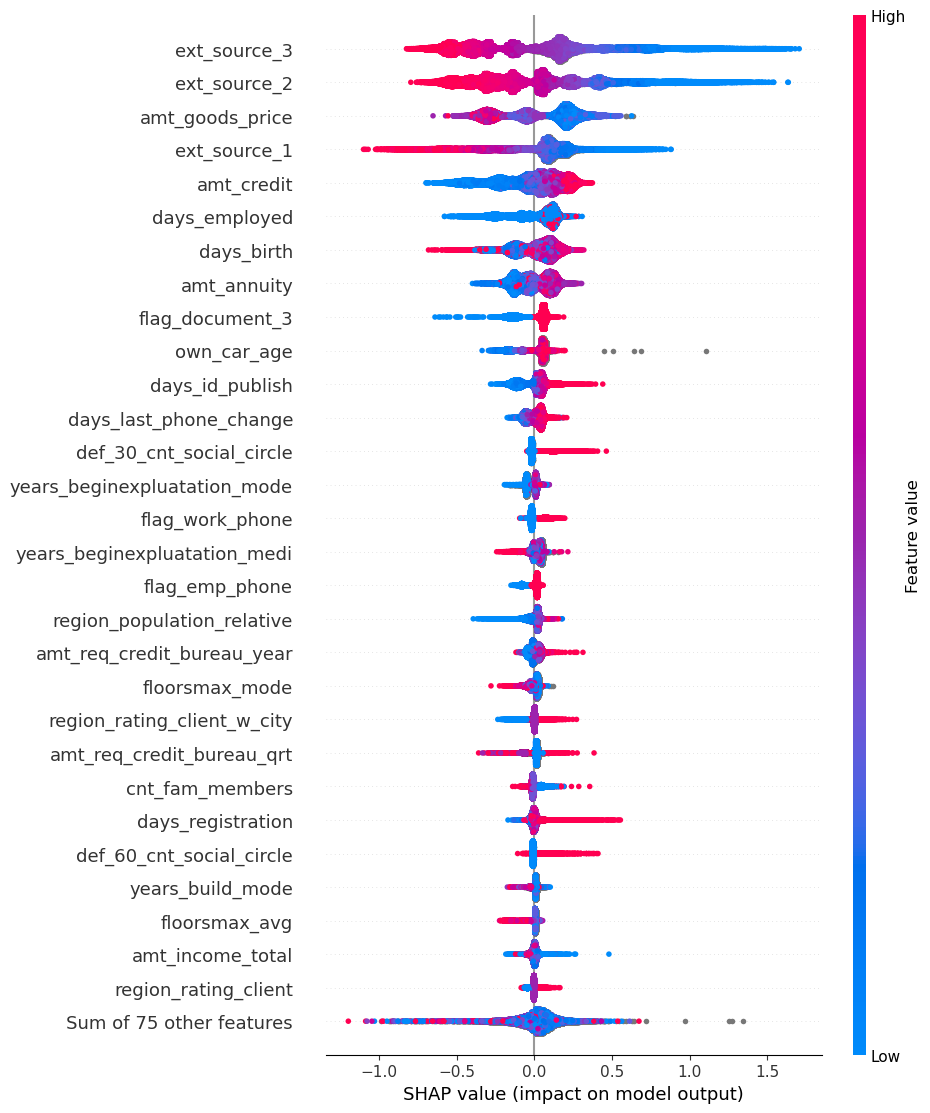

In [27]:
shap.plots.beeswarm(shap_values, max_display=30)

In [28]:
shap.plots.force(shap_values[:200])

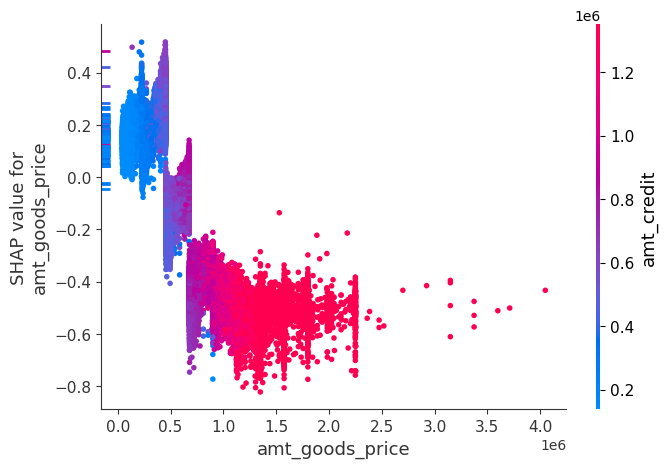

In [29]:
shap.dependence_plot("amt_goods_price", shap_values.values, x_test, )

### Lime
https://christophm.github.io/interpretable-ml-book/lime.html <br>
https://github.com/marcotcr/lime <br>
![image.png](lime.png)

Ссылки: <br>
дока shap - https://shap.readthedocs.io/en/latest/tabular_examples.html <br> 
больше математики - https://christophm.github.io/interpretable-ml-book/shap.html <br>
объяснение shap habr - https://habr.com/ru/companies/ods/articles/599573/ <br>
доклад про shap c PyData - https://www.youtube.com/watch?v=0yXtdkIL3Xk <br>
